In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [106]:
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

In [107]:
train_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city,price
0,149653,Private bedroom located in Downtown Manhattan,257599351.0,Sandra And Katharina,Manhattan,Chinatown,40.71703,-73.99538,Private room,2.0,17.0,18/09/19,1.04,1.0,0.0,New York City,100.0
1,74702,"Quiet, Comfy West LA Cottage - HSR 19-000047",2882551.0,James,City of Los Angeles,Mar Vista,34.01257,-118.44254,Entire home/apt,2.0,331.0,07/09/20,4.28,1.0,170.0,Los Angeles,102.0
2,95858,Home away from Home !,287662307.0,Kahee,Other Cities,Pasadena,34.14255,-118.09888,Entire home/apt,10.0,4.0,29/03/20,0.37,1.0,306.0,Los Angeles,131.0
3,61301,Kukui‚Äôula Club Villa 11,198477445.0,Lodge,Kauai,Koloa-Poipu,21.88471,-159.48359,Entire home/apt,1.0,0.0,NaN,NaN,19.0,358.0,Hawaii,2399.0
4,132101,One bedroom apartment,87835557.0,Kostas,Queens,Astoria,40.76623,-73.90911,Entire home/apt,2.0,189.0,31/08/20,3.82,1.0,331.0,New York City,76.0


# Data Information and Description:

In [108]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              137023 non-null  int64  
 1   name                            137007 non-null  object 
 2   host_id                         137023 non-null  float64
 3   host_name                       137002 non-null  object 
 4   neighbourhood_group             80300 non-null   object 
 5   neighbourhood                   137023 non-null  object 
 6   latitude                        137023 non-null  float64
 7   longitude                       137023 non-null  float64
 8   room_type                       137023 non-null  object 
 9   minimum_nights                  137023 non-null  float64
 10  number_of_reviews               137023 non-null  float64
 11  last_review                     107232 non-null  object 
 12  reviews_per_mont

In [109]:
train_df.describe()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
count,137023.000000,1.370230e+05,137023.000000,137023.000000,137023.000000,137023.000000,107232.000000,137023.000000,137023.000000,137023.000000
mean,85580.723397,9.632567e+07,34.584207,-101.510148,10.446071,33.138831,1.387220,17.226174,163.602446,205.281792
std,49471.662411,1.007056e+08,7.063332,28.013884,25.593436,61.903532,1.650963,52.670175,140.766748,504.573579
min,1.000000,2.300000e+01,18.920990,-159.714900,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,42729.500000,1.431064e+07,30.249505,-118.365710,1.000000,1.000000,0.220000,1.000000,1.000000,75.000000
50%,85640.000000,5.274681e+07,36.058990,-90.105520,3.000000,7.000000,0.780000,2.000000,151.000000,120.000000
75%,128374.500000,1.543914e+08,40.718400,-73.989320,7.000000,37.000000,2.000000,7.000000,316.000000,200.000000
max,171279.000000,3.679071e+08,45.617270,-70.995950,1250.000000,966.000000,44.060000,593.000000,365.000000,24999.000000


In [110]:
#Dropping unnecessary columns from the training data
train_df.drop('id', axis = 1, inplace = True)
train_df.drop('name', axis = 1, inplace = True)
train_df.drop('host_id', axis = 1, inplace = True)
train_df.drop('host_name', axis = 1, inplace = True)

# Imputing Missing Values:

In [111]:
train_df.isna().sum()

neighbourhood_group               56723
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
last_review                       29791
reviews_per_month                 29791
calculated_host_listings_count        0
availability_365                      0
city                                  0
price                                 0
dtype: int64

In [112]:
train_df.drop('last_review', axis = 1, inplace = True)

train_df['reviews_per_month'] = train_df['reviews_per_month'].fillna(0)
train_df['neighbourhood_group'].fillna(value = 'no info', inplace = True)

In [113]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   neighbourhood_group             137023 non-null  object 
 1   neighbourhood                   137023 non-null  object 
 2   latitude                        137023 non-null  float64
 3   longitude                       137023 non-null  float64
 4   room_type                       137023 non-null  object 
 5   minimum_nights                  137023 non-null  float64
 6   number_of_reviews               137023 non-null  float64
 7   reviews_per_month               137023 non-null  float64
 8   calculated_host_listings_count  137023 non-null  float64
 9   availability_365                137023 non-null  float64
 10  city                            137023 non-null  object 
 11  price                           137023 non-null  float64
dtypes: float64(8), o

# EDA:

<AxesSubplot:xlabel='price', ylabel='Count'>

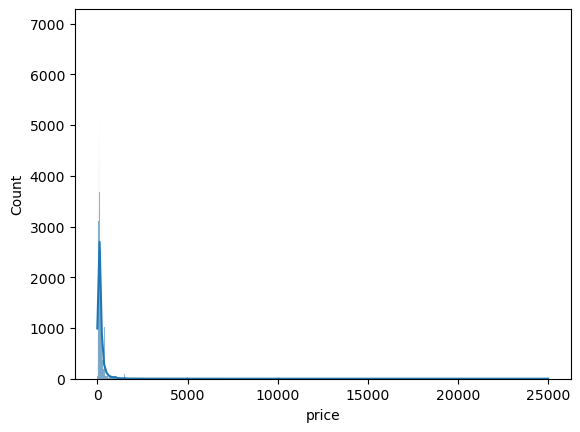

In [11]:
sns.histplot(data = train_df, x = 'price', kde = True)

<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='Count'>

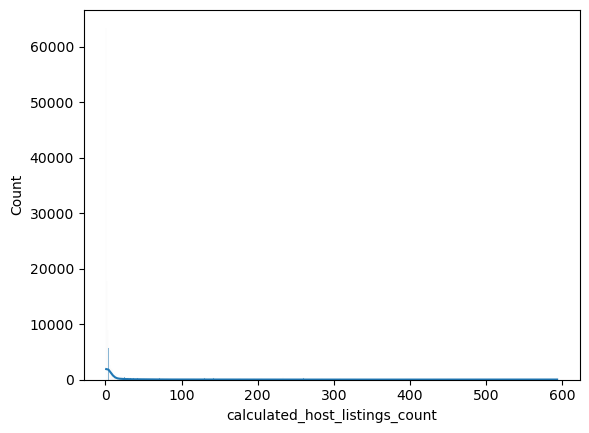

In [12]:
sns.histplot(data = train_df, x = 'calculated_host_listings_count', kde = True)

<AxesSubplot:xlabel='minimum_nights', ylabel='Count'>

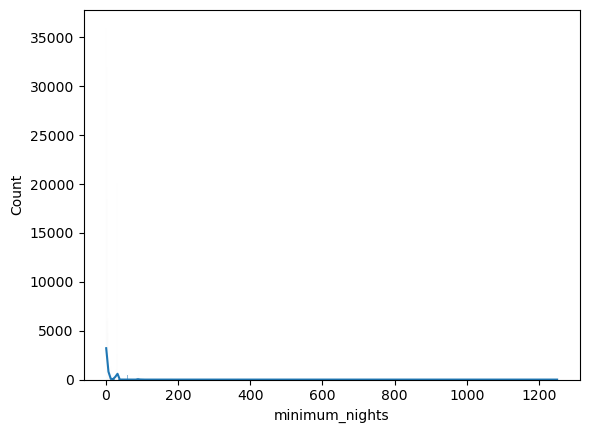

In [13]:
sns.histplot(data = train_df, x = 'minimum_nights', kde = True)

<AxesSubplot:xlabel='number_of_reviews', ylabel='Count'>

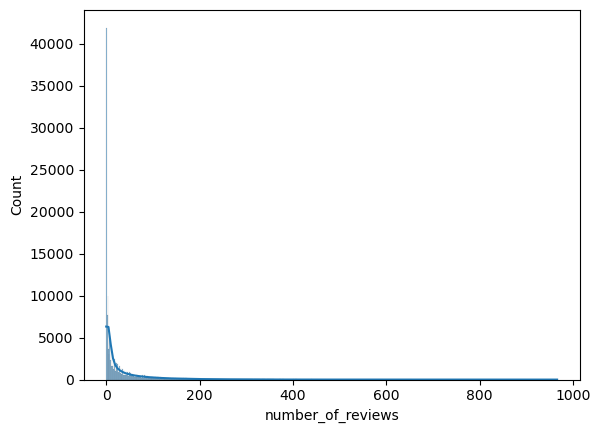

In [14]:
sns.histplot(data = train_df, x = 'number_of_reviews', kde = True)

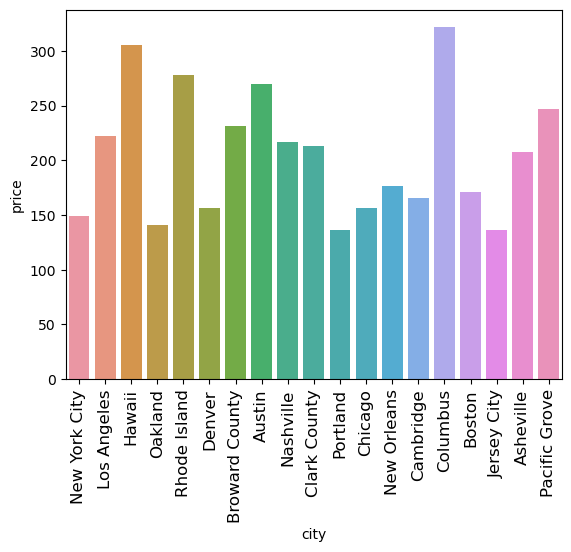

In [15]:
sns.barplot(x = 'city', y = 'price', data = train_df, ci = None)
plt.xticks(rotation = 90, size=12)
plt.show()

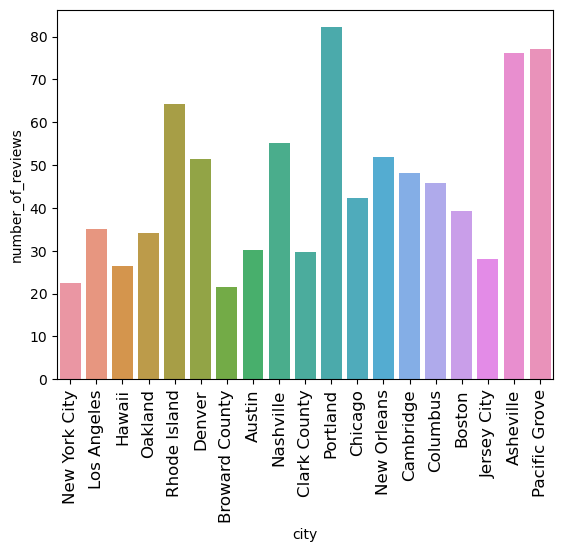

In [16]:
sns.barplot(data = train_df, x = 'city', y = 'number_of_reviews', ci = None)
plt.xticks(rotation = 90, size=12)
plt.show()

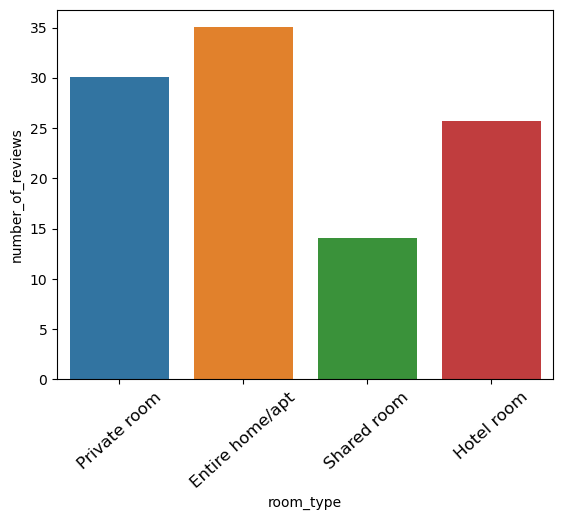

In [17]:
sns.barplot(data = train_df, x = 'room_type', y = 'number_of_reviews', ci = None)
plt.xticks(rotation = 42, size=12)
plt.show()

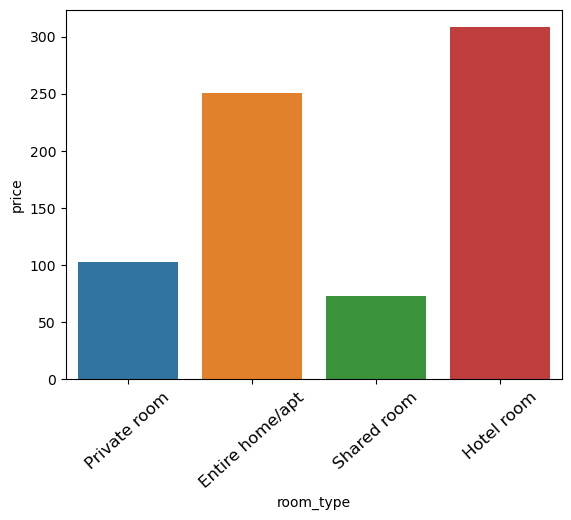

In [18]:
sns.barplot(data = train_df, x = 'room_type', y = 'price', ci = None)
plt.xticks(rotation = 42, size=12)
plt.show()

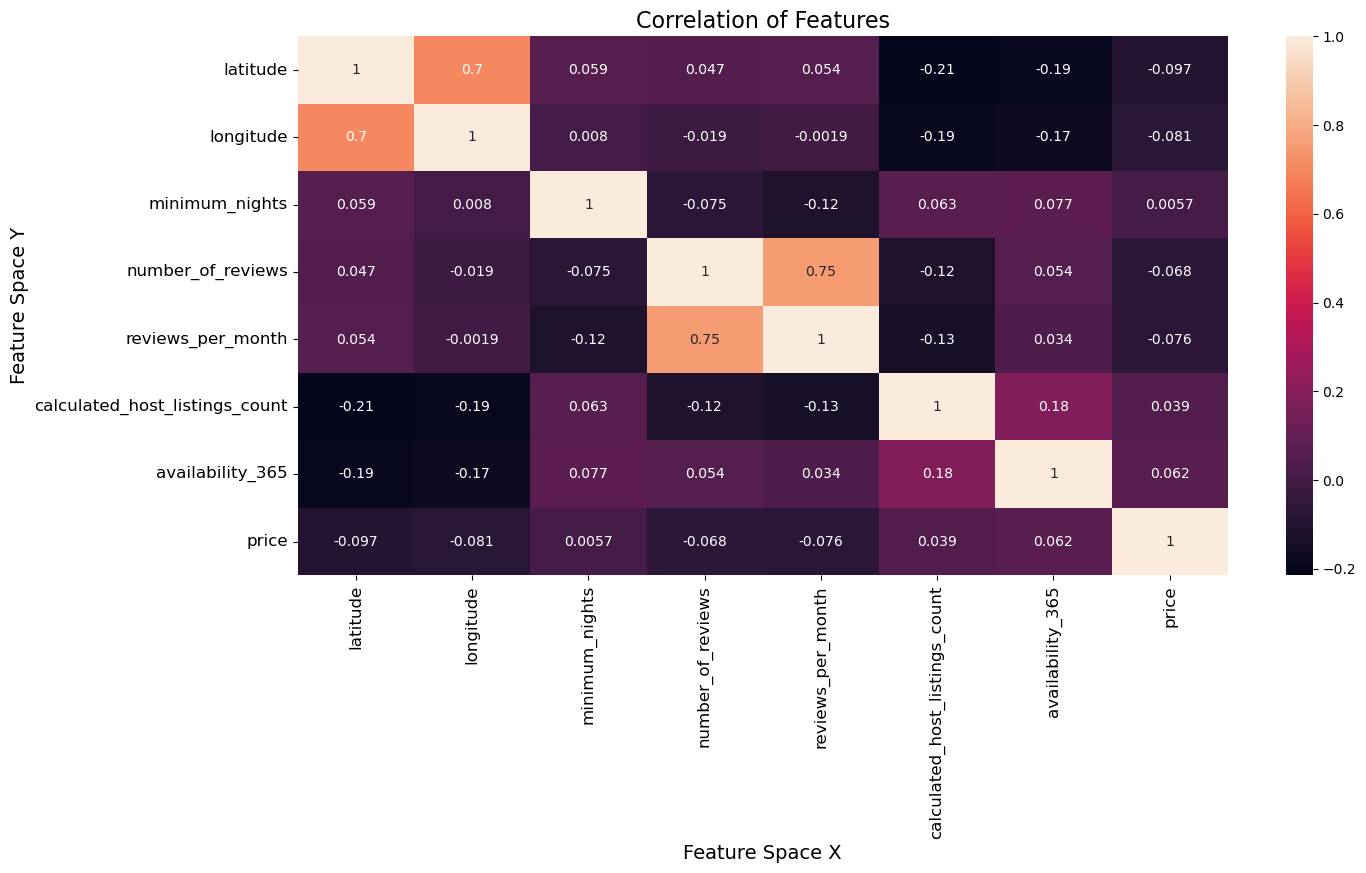

In [19]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(data=train_df.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

# Label Encoder:

In [114]:
train_df['room_type'] = train_df['room_type'].map({'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2, 'Hotel room': 3})

In [115]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [116]:
train_df['neighbourhood_group'] = encoder.fit_transform(train_df['neighbourhood_group'])
train_df['neighbourhood'] = encoder.fit_transform(train_df['neighbourhood'])
train_df['city'] = encoder.fit_transform(train_df['city'])

In [117]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   neighbourhood_group             137023 non-null  int32  
 1   neighbourhood                   137023 non-null  int32  
 2   latitude                        137023 non-null  float64
 3   longitude                       137023 non-null  float64
 4   room_type                       137023 non-null  int64  
 5   minimum_nights                  137023 non-null  float64
 6   number_of_reviews               137023 non-null  float64
 7   reviews_per_month               137023 non-null  float64
 8   calculated_host_listings_count  137023 non-null  float64
 9   availability_365                137023 non-null  float64
 10  city                            137023 non-null  int32  
 11  price                           137023 non-null  float64
dtypes: float64(8), i

# Handling outliers:

In [118]:
train_df.skew()

neighbourhood_group               -0.231484
neighbourhood                     -0.010098
latitude                          -0.725820
longitude                         -0.740660
room_type                          1.661443
minimum_nights                    15.694661
number_of_reviews                  3.702934
reviews_per_month                  2.677926
calculated_host_listings_count     6.388123
availability_365                   0.182854
city                              -0.655732
price                             20.790929
dtype: float64

In [119]:
def get_bounds(train_df, col):
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3-Q1
    Upper = Q3+(1.5*IQR)
    Lower = Q1-(1.5*IQR)
    return Upper, Lower

In [120]:
num_cols = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'price', 'neighbourhood_group', 'room_type']

In [121]:
for col in num_cols:
    Upper, Lower = get_bounds(train_df, col)
    train_df[col] = np.where(train_df[col]>Upper, Upper, train_df[col])
    train_df[col] = np.where(train_df[col]<Lower, Lower, train_df[col])

neighbourhood_group


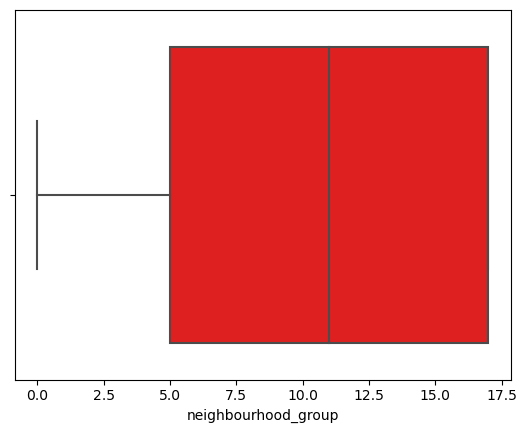

neighbourhood


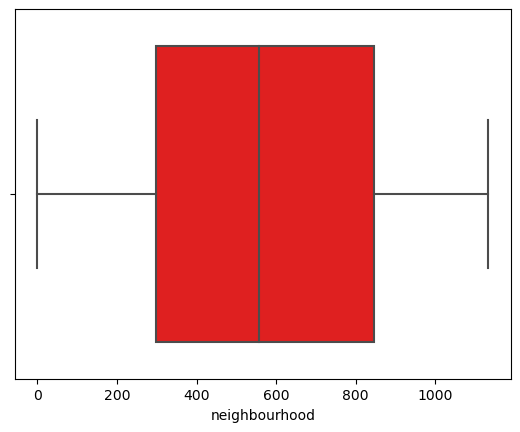

latitude


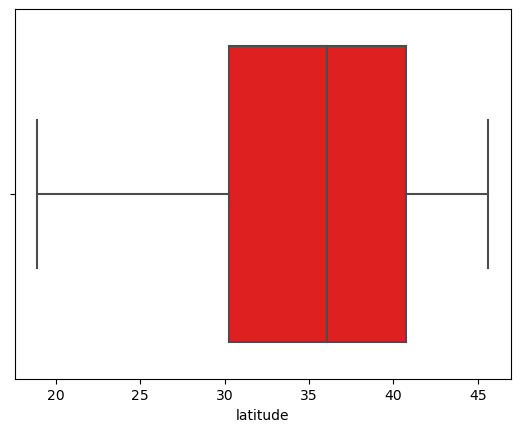

longitude


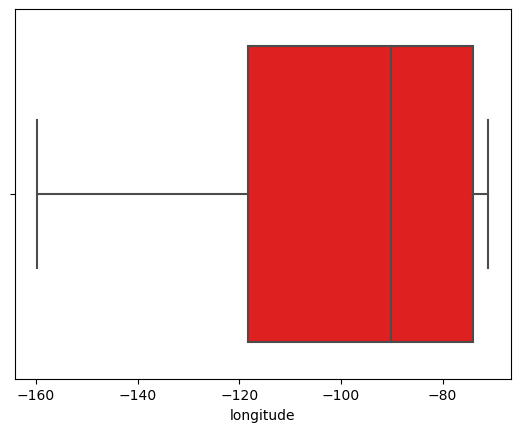

room_type


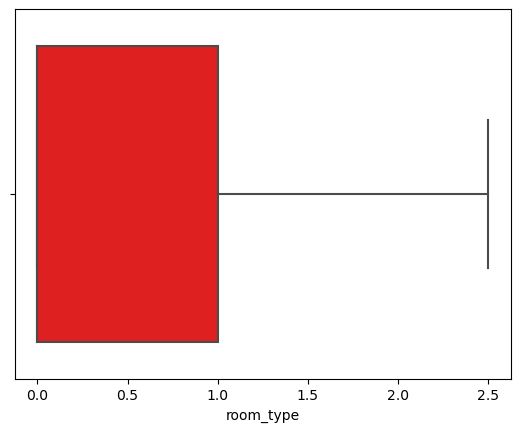

minimum_nights


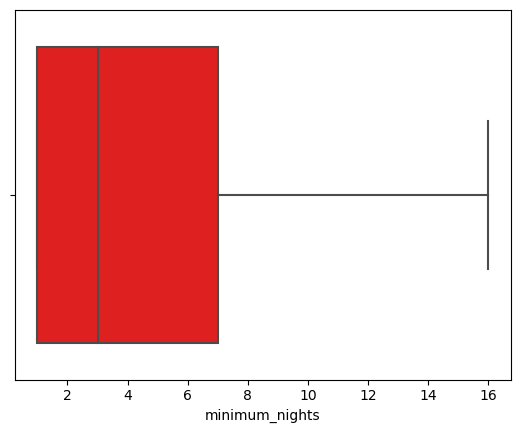

number_of_reviews


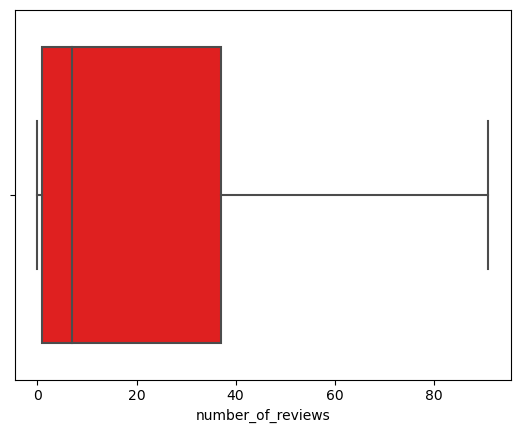

reviews_per_month


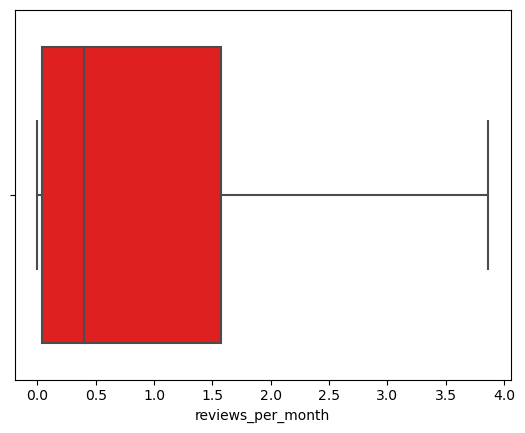

calculated_host_listings_count


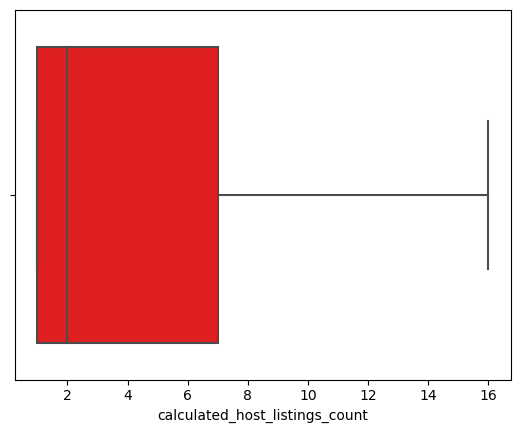

availability_365


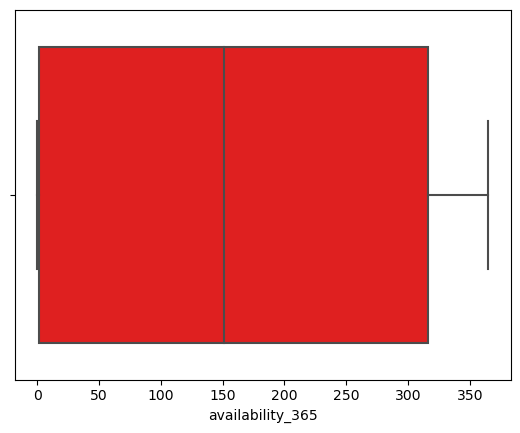

city


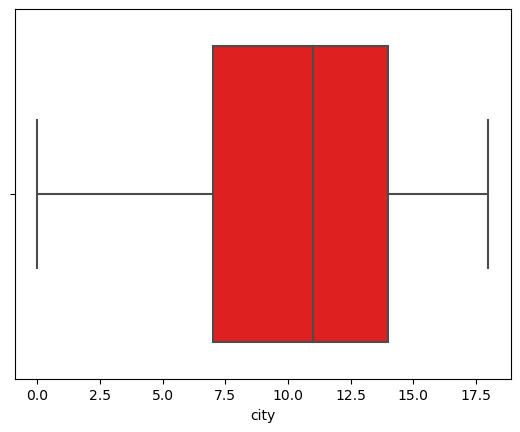

price


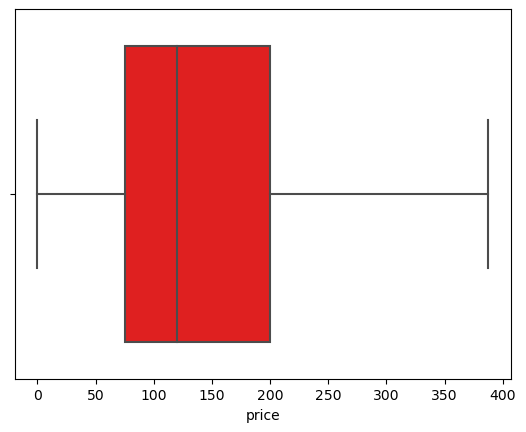

In [122]:
for col in train_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

In [123]:
train_df.skew()

neighbourhood_group              -0.231484
neighbourhood                    -0.010098
latitude                         -0.725820
longitude                        -0.740660
room_type                         1.378546
minimum_nights                    1.105504
number_of_reviews                 1.228349
reviews_per_month                 1.230986
calculated_host_listings_count    1.219165
availability_365                  0.182854
city                             -0.655732
price                             1.039221
dtype: float64

In [124]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   neighbourhood_group             137023 non-null  float64
 1   neighbourhood                   137023 non-null  int32  
 2   latitude                        137023 non-null  float64
 3   longitude                       137023 non-null  float64
 4   room_type                       137023 non-null  float64
 5   minimum_nights                  137023 non-null  float64
 6   number_of_reviews               137023 non-null  float64
 7   reviews_per_month               137023 non-null  float64
 8   calculated_host_listings_count  137023 non-null  float64
 9   availability_365                137023 non-null  float64
 10  city                            137023 non-null  int32  
 11  price                           137023 non-null  float64
dtypes: float64(10), 

# Train-Test Split:

In [125]:
x = train_df.iloc[:, 0: 11]
y = train_df['price']

In [126]:
x

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
0,8.0,213,40.71703,-73.99538,1.0,2.0,17.0,1.040,1.0,0.0,14
1,3.0,640,34.01257,-118.44254,0.0,2.0,91.0,3.865,1.0,170.0,11
2,11.0,794,34.14255,-118.09888,0.0,10.0,4.0,0.370,1.0,306.0,11
3,6.0,559,21.88471,-159.48359,0.0,1.0,0.0,0.000,16.0,358.0,9
4,13.0,86,40.76623,-73.90911,0.0,2.0,91.0,3.820,1.0,331.0,14
...,...,...,...,...,...,...,...,...,...,...,...
137018,8.0,919,40.72329,-73.99810,0.0,3.0,1.0,0.020,1.0,0.0,14
137019,3.0,328,34.04472,-118.25665,1.0,1.0,0.0,0.000,14.0,91.0,11
137020,13.0,1126,40.69050,-73.85612,0.0,2.0,89.0,1.790,1.0,92.0,14
137021,2.0,1118,40.71954,-73.94610,1.0,5.0,1.0,0.050,2.0,365.0,14


In [127]:
y

0         100.0
1         102.0
2         131.0
3         387.5
4          76.0
          ...  
137018    387.5
137019    387.5
137020     85.0
137021    100.0
137022    110.0
Name: price, Length: 137023, dtype: float64

In [128]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [129]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(95916, 11)
(41107, 11)
(95916,)
(41107,)


# Standard Scaler:

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [131]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 1. RandomForestRegressor :

In [132]:
from sklearn.ensemble import RandomForestRegressor

In [133]:
rfr = RandomForestRegressor(random_state = 42)

In [134]:
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [135]:
y_pred_rfr_train = rfr.predict(x_train)
y_pred_rfr_test = rfr.predict(x_test)

# Model Evaluation:

In [136]:
from sklearn import metrics

In [137]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_rfr_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr_test))

In [138]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 27.935001733615287
RMSE for test set is 74.20382078570843


In [139]:
r2_train = metrics.r2_score(y_train,y_pred_rfr_train)
r2_test = metrics.r2_score(y_test,y_pred_rfr_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.9289890527471252
R2 score for test set is 0.49715805323641693


<AxesSubplot:xlabel='price'>

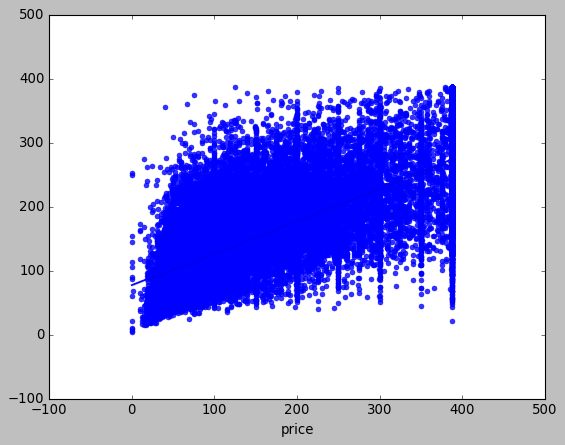

In [198]:
sns.regplot(y_test, y_pred_rfr_test)

# PCA :

In [140]:
from sklearn.decomposition import PCA

pca = PCA(n_components = len(x.columns))
pca.fit(x_train)

PCA(n_components=11)

In [141]:
pca.explained_variance_ratio_

array([0.20135076, 0.18759921, 0.14068249, 0.09838817, 0.09061921,
       0.08133036, 0.07012206, 0.05912624, 0.03709973, 0.01800138,
       0.01568039])

In [142]:
var = np.cumsum(np.round(pca.explained_variance_ratio_, 2))

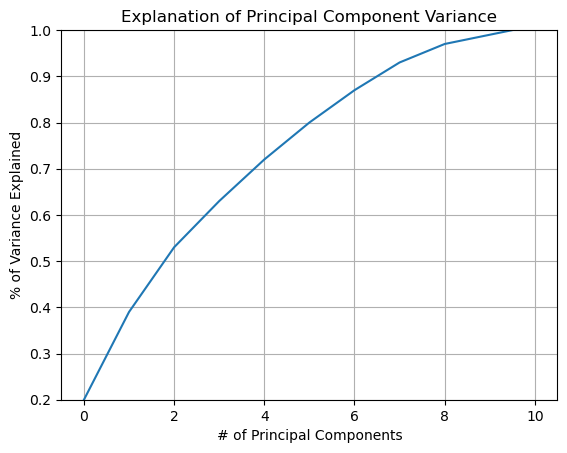

In [143]:
plt.ylabel('% of Variance Explained')
plt.xlabel('# of Principal Components')
plt.title('Explanation of Principal Component Variance')
plt.ylim(min(var),1)
plt.style.context('seaborn-whitegrid')
plt.grid(True)
plt.plot(var)
plt.show()

In [144]:
pca = PCA(n_components = 8)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

# 2. Applying PCA on RandomForest Regressor:

In [145]:
rfr_pca = RandomForestRegressor()

In [146]:
rfr_pca.fit(x_train_pca, y_train)

RandomForestRegressor()

In [147]:
y_pred_pcaRfr_train = rfr_pca.predict(x_train_pca)
y_pred_pcaRfr_test = rfr_pca.predict(x_test_pca)

# Model Evaluation:

In [148]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_pcaRfr_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_pcaRfr_test))

In [149]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 30.484933345484794
RMSE for test set is 84.06559236998406


In [150]:
r2_train = metrics.r2_score(y_train,y_pred_pcaRfr_train)
r2_test = metrics.r2_score(y_test,y_pred_pcaRfr_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.9154334914969442
R2 score for test set is 0.3546199764477914


<AxesSubplot:xlabel='price'>

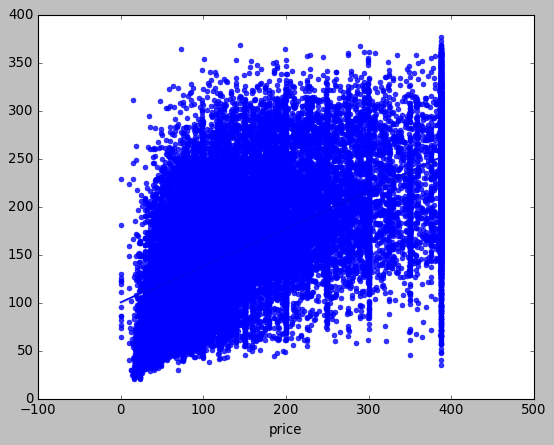

In [197]:
sns.regplot(y_test, y_pred_pcaRfr_test)

# 3. KNeighborsRegressor :

In [151]:
from sklearn.neighbors import KNeighborsRegressor


In [163]:
kn = KNeighborsRegressor(n_neighbors = 5)

In [152]:
kn.fit(x_train, y_train)

KNeighborsRegressor()

In [153]:
y_pred_kn_train = kn.predict(x_train)
y_pred_kn_test = kn.predict(x_test)

# Model Evaluation:

In [155]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_kn_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_kn_test))

In [156]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 68.39172868166436
RMSE for test set is 83.86879443790788


In [157]:
r2_train = metrics.r2_score(y_train,y_pred_kn_train)
r2_test = metrics.r2_score(y_test,y_pred_kn_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.5743672245298977
R2 score for test set is 0.35763811468029794


<AxesSubplot:xlabel='price'>

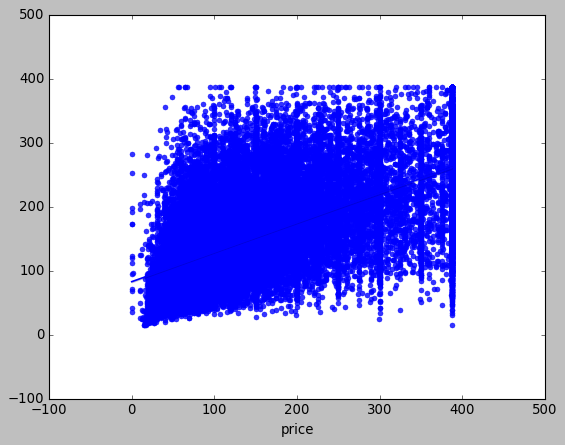

In [195]:
sns.regplot(y_test, y_pred_kn_test)

# Finding the least error to decide the best k value:

In [158]:
error = []

for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

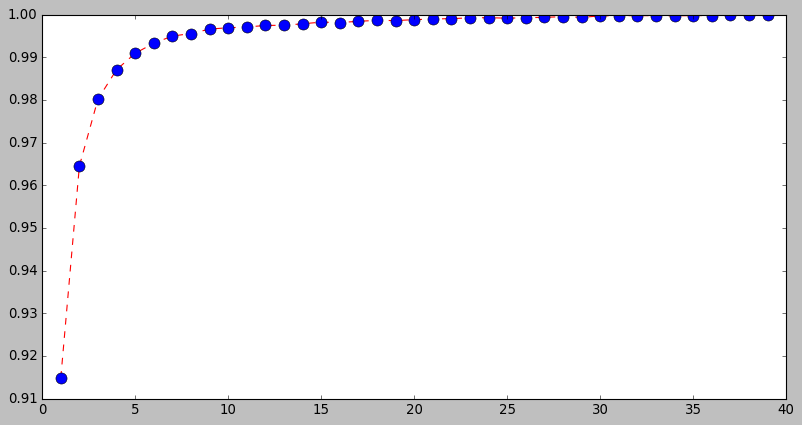

In [160]:
plt.style.use("classic")
plt.figure(figsize = (12,6))
plt.plot(range(1, 40), error, color = "red", linestyle = "dashed", marker = "o", markerfacecolor = "blue", markersize = 10)
plt.show()

In [168]:
knn2 = KNeighborsRegressor(n_neighbors = 3)

In [169]:
knn2.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [170]:
y_pred_kn2_train = knn2.predict(x_train)
y_pred_kn2_test = knn2.predict(x_test)

# Model Evaluation:

In [171]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_kn2_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_kn2_test))

In [172]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 61.203622862949864
RMSE for test set is 87.3430188303676


In [173]:
r2_train = metrics.r2_score(y_train,y_pred_kn2_train)
r2_test = metrics.r2_score(y_test,y_pred_kn2_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.6591351952631159
R2 score for test set is 0.3033167645809215


<AxesSubplot:xlabel='price'>

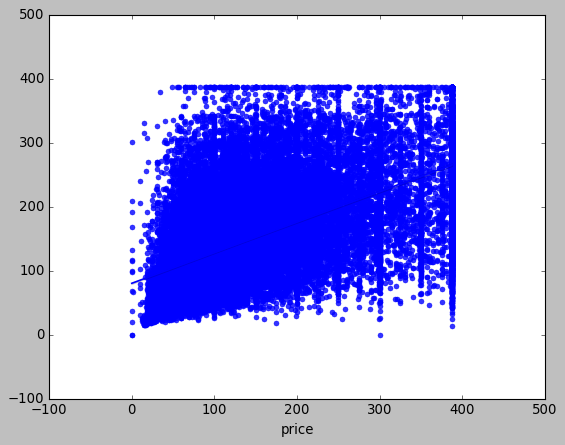

In [194]:
sns.regplot(y_test, y_pred_kn2_test)

# 4. VotingRegressor :

In [180]:
from sklearn.ensemble import VotingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
r1 = LinearRegression()
r2 = DecisionTreeRegressor()
r3 = KNeighborsRegressor()

er = VotingRegressor([('lr', r1), ('dt', r2), ('KN', r3)])


In [181]:
er.fit(x_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor()),
                            ('KN', KNeighborsRegressor())])

In [182]:
y_pred_vote_train = er.predict(x_train)
y_pred_vote_test = er.predict(x_test)

# Model Evaluation:

In [183]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_vote_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_vote_test))

In [184]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 50.04352286203256
RMSE for test set is 80.61298075317183


In [185]:
r2_train = metrics.r2_score(y_train,y_pred_vote_train)
r2_test = metrics.r2_score(y_test,y_pred_vote_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.7721108492162636
R2 score for test set is 0.40654345576094275


<AxesSubplot:xlabel='price'>

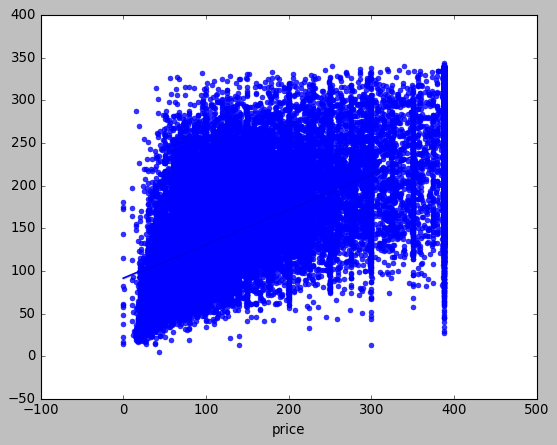

In [193]:
sns.regplot(y_test, y_pred_vote_test)

# 5. AdaBoostRegressor :

In [186]:
from sklearn.ensemble import AdaBoostRegressor

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

regr_ADA = AdaBoostRegressor(base_estimator = lr, n_estimators=100)

In [187]:
regr_ADA.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=100)

In [188]:
y_pred_ADA_train = regr_ADA.predict(x_train)
y_pred_ADA_test = regr_ADA.predict(x_test)

# Model Evaluation:

In [189]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_ADA_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ADA_test))

In [190]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 92.96801474948808
RMSE for test set is 92.61394320638313


In [191]:
r2_train = metrics.r2_score(y_train,y_pred_ADA_train)
r2_test = metrics.r2_score(y_test,y_pred_ADA_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.2135067225633248
R2 score for test set is 0.21669352899909022


<AxesSubplot:xlabel='price'>

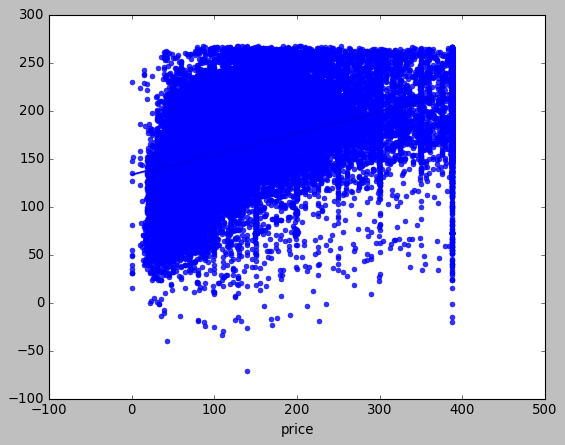

In [192]:
sns.regplot(y_test, y_pred_ADA_test)

# 6. BaggingRegressor :

In [212]:
from sklearn.ensemble import RandomForestRegressor
r1 = RandomForestRegressor()

from sklearn.ensemble import BaggingRegressor

regr_BAG = BaggingRegressor(base_estimator=r1, n_estimators=10)

regr_BAG.fit(x_train, y_train)

BaggingRegressor(base_estimator=RandomForestRegressor())

In [213]:
y_pred_bag_train = regr_BAG.predict(x_train)
y_pred_bag_test = regr_BAG.predict(x_test)

# Model Evaluation:

In [214]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_bag_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_bag_test))

In [215]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 45.19871096012156
RMSE for test set is 73.98575524705518


In [216]:
r2_train = metrics.r2_score(y_train,y_pred_bag_train)
r2_test = metrics.r2_score(y_test,y_pred_bag_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.8140997392102154
R2 score for test set is 0.5001091514109108


<AxesSubplot:xlabel='price'>

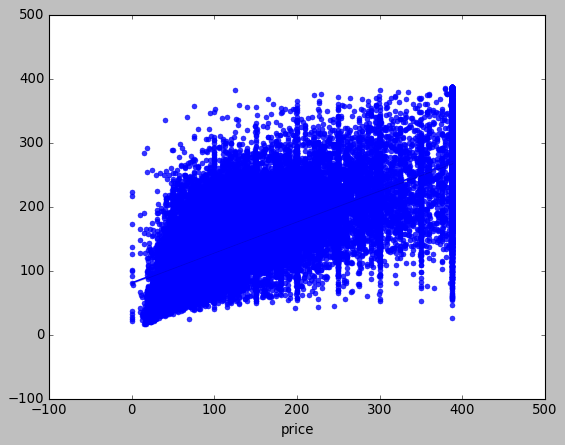

In [217]:
sns.regplot(y_test, y_pred_bag_test)

In [274]:
test_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,49653,Beachfront Bungalow & Home of Honu,24843776.0,Marco,Maui,Lahaina,20.95924,-156.68334,Entire home/apt,3.0,79.0,25/03/20,1.18,1.0,275.0,Hawaii
1,128272,Resort-like living in Williamsburg,14461742.0,Mohammed,Brooklyn,Williamsburg,40.71552,-73.93869,Entire home/apt,5.0,1.0,01/01/16,0.02,1.0,0.0,New York City
2,88753,Los Angeles Luxury Apartment in Downtown LA,205959517.0,Christian,City of Los Angeles,Downtown,34.04331,-118.25804,Entire home/apt,30.0,0.0,NaN,NaN,1.0,354.0,Los Angeles
3,151475,E Z Living In Harlem 2,244536777.0,Chester,Manhattan,Harlem,40.81615,-73.94359,Entire home/apt,3.0,4.0,01/12/19,0.30,2.0,180.0,New York City
4,134525,"Cozy, neat, spacious 2 BR apartment in East Ha...",2247818.0,Gonda,Manhattan,East Harlem,40.80268,-73.94051,Entire home/apt,10.0,33.0,13/03/20,0.77,1.0,10.0,New York City


In [275]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34257 entries, 0 to 34256
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34257 non-null  int64  
 1   name                            34252 non-null  object 
 2   host_id                         34257 non-null  float64
 3   host_name                       34250 non-null  object 
 4   neighbourhood_group             20131 non-null  object 
 5   neighbourhood                   34257 non-null  object 
 6   latitude                        34257 non-null  float64
 7   longitude                       34257 non-null  float64
 8   room_type                       34257 non-null  object 
 9   minimum_nights                  34257 non-null  float64
 10  number_of_reviews               34257 non-null  float64
 11  last_review                     26850 non-null  object 
 12  reviews_per_month               

In [276]:
test_df.drop('id', axis = 1, inplace = True)
test_df.drop('name', axis = 1, inplace = True)
test_df.drop('host_id', axis = 1, inplace = True)
test_df.drop('host_name', axis = 1, inplace = True)

In [277]:
test_df.isna().sum()

neighbourhood_group               14126
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
last_review                        7407
reviews_per_month                  7407
calculated_host_listings_count        0
availability_365                      0
city                                  0
dtype: int64

In [278]:
test_df.drop('last_review', axis = 1, inplace = True)

test_df['reviews_per_month'] = test_df['reviews_per_month'].fillna(0)
test_df['neighbourhood_group'].fillna(value = 'no info', inplace = True)

In [279]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34257 entries, 0 to 34256
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             34257 non-null  object 
 1   neighbourhood                   34257 non-null  object 
 2   latitude                        34257 non-null  float64
 3   longitude                       34257 non-null  float64
 4   room_type                       34257 non-null  object 
 5   minimum_nights                  34257 non-null  float64
 6   number_of_reviews               34257 non-null  float64
 7   reviews_per_month               34257 non-null  float64
 8   calculated_host_listings_count  34257 non-null  float64
 9   availability_365                34257 non-null  float64
 10  city                            34257 non-null  object 
dtypes: float64(7), object(4)
memory usage: 2.9+ MB


In [280]:
test_df['room_type'] = test_df['room_type'].map({'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2, 'Hotel room': 3})

In [281]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [282]:
test_df['neighbourhood_group'] = encoder.fit_transform(test_df['neighbourhood_group'])
test_df['neighbourhood'] = encoder.fit_transform(test_df['neighbourhood'])
test_df['city'] = encoder.fit_transform(test_df['city'])

In [283]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34257 entries, 0 to 34256
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             34257 non-null  int32  
 1   neighbourhood                   34257 non-null  int32  
 2   latitude                        34257 non-null  float64
 3   longitude                       34257 non-null  float64
 4   room_type                       34257 non-null  int64  
 5   minimum_nights                  34257 non-null  float64
 6   number_of_reviews               34257 non-null  float64
 7   reviews_per_month               34257 non-null  float64
 8   calculated_host_listings_count  34257 non-null  float64
 9   availability_365                34257 non-null  float64
 10  city                            34257 non-null  int32  
dtypes: float64(7), int32(3), int64(1)
memory usage: 2.5 MB


In [284]:
test_df.skew()

neighbourhood_group               -0.228481
neighbourhood                     -0.004778
latitude                          -0.752187
longitude                         -0.748394
room_type                          1.712921
minimum_nights                    14.292272
number_of_reviews                  3.550088
reviews_per_month                  2.877653
calculated_host_listings_count     6.213591
availability_365                   0.188219
city                              -0.667621
dtype: float64

In [285]:
def get_bounds(test_df, col):
    Q1 = test_df[col].quantile(0.25)
    Q3 = test_df[col].quantile(0.75)
    IQR = Q3-Q1
    Upper = Q3+(1.5*IQR)
    Lower = Q1-(1.5*IQR)
    return Upper, Lower

In [286]:
num_col = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'neighbourhood_group', 'room_type']

In [287]:
for col in num_col:
    Upper, Lower = get_bounds(test_df, col)
    test_df[col] = np.where(test_df[col]>Upper, Upper, test_df[col])
    test_df[col] = np.where(test_df[col]<Lower, Lower, test_df[col])

neighbourhood_group


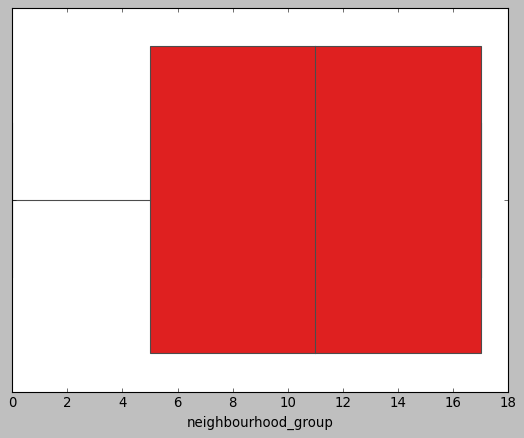

neighbourhood


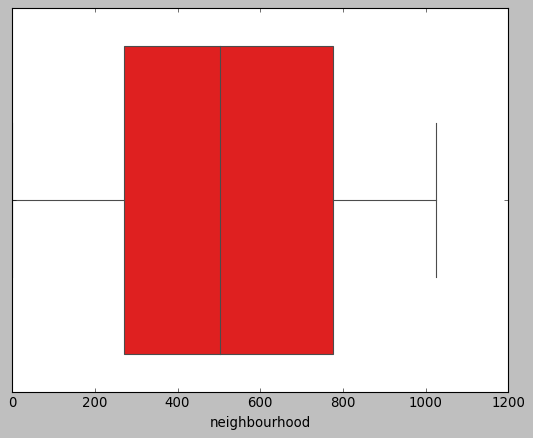

latitude


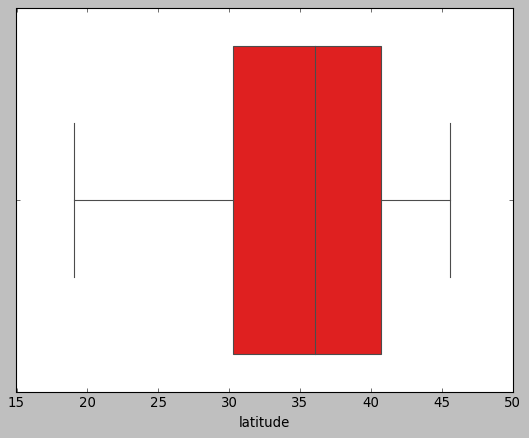

longitude


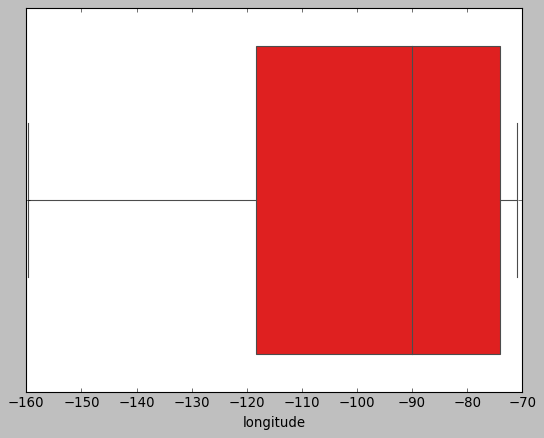

room_type


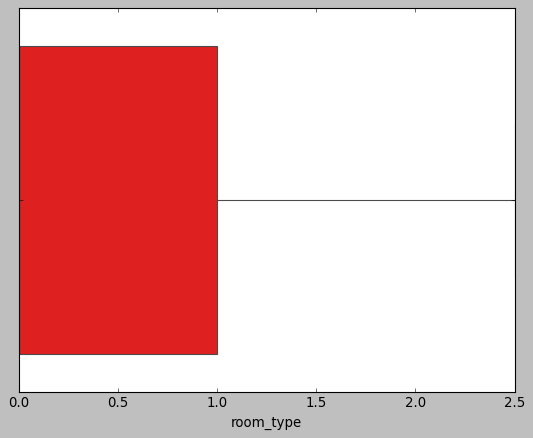

minimum_nights


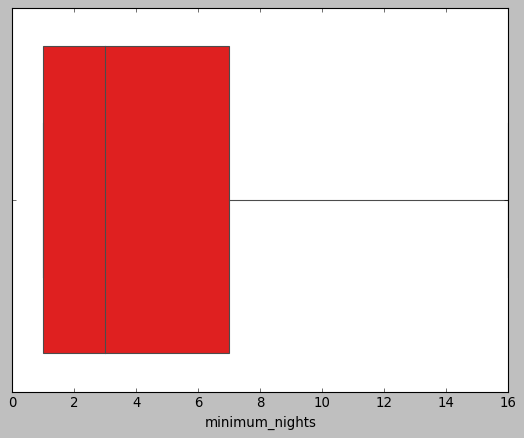

number_of_reviews


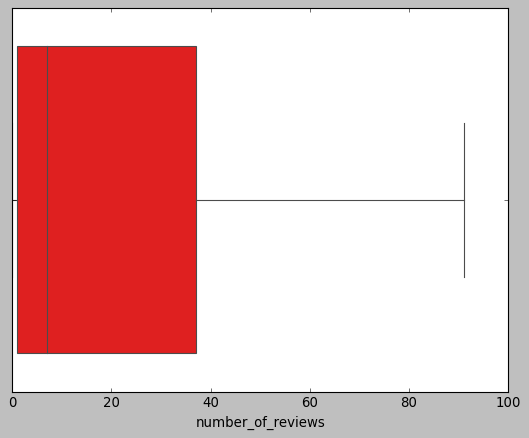

reviews_per_month


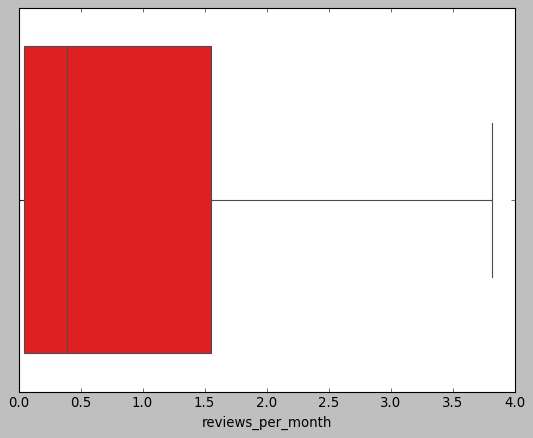

calculated_host_listings_count


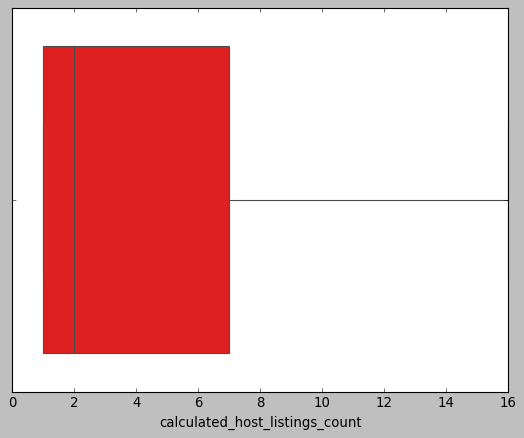

availability_365


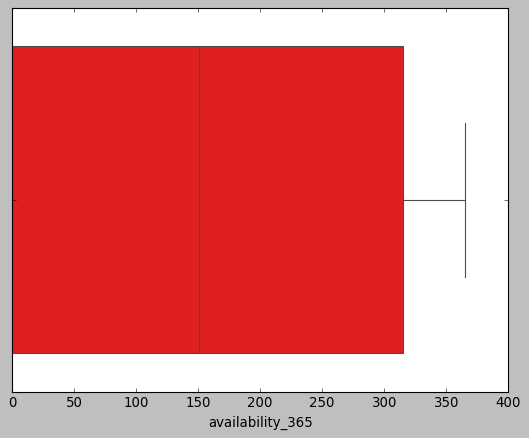

city


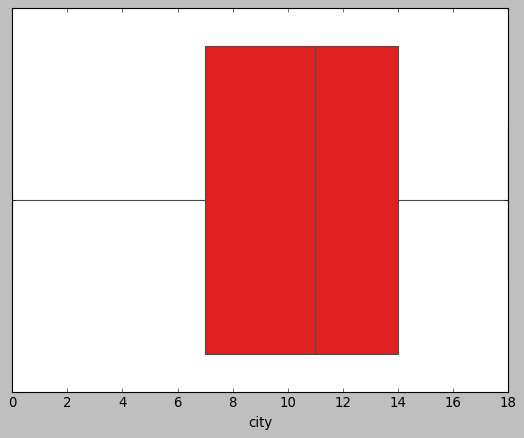

In [288]:
for col in test_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [289]:
test_df.skew()

neighbourhood_group              -0.228481
neighbourhood                    -0.004778
latitude                         -0.752187
longitude                        -0.748394
room_type                         1.404556
minimum_nights                    1.123369
number_of_reviews                 1.232944
reviews_per_month                 1.226674
calculated_host_listings_count    1.236940
availability_365                  0.188219
city                             -0.667621
dtype: float64

In [290]:
df_test = test_df.iloc[:, 0:]

In [291]:
df_test

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
0,9.0,513,20.95924,-156.68334,0.0,3.0,79.0,1.18,1.0,275.0,9
1,2.0,1012,40.71552,-73.93869,0.0,5.0,1.0,0.02,1.0,0.0,14
2,3.0,297,34.04331,-118.25804,0.0,16.0,0.0,0.00,1.0,354.0,11
3,8.0,432,40.81615,-73.94359,0.0,3.0,4.0,0.30,2.0,180.0,14
4,8.0,312,40.80268,-73.94051,0.0,10.0,33.0,0.77,1.0,10.0,14
...,...,...,...,...,...,...,...,...,...,...,...
34252,2.0,239,40.67695,-73.95410,1.0,1.0,0.0,0.00,5.0,89.0,14
34253,17.0,655,41.95748,-87.69219,0.0,3.0,59.0,1.50,1.0,359.0,5
34254,17.0,389,37.83956,-122.27655,1.0,1.0,22.0,2.34,5.0,326.0,15
34255,17.0,919,36.00849,-115.17657,0.0,7.0,0.0,0.00,10.0,124.0,6


In [292]:
predicted_test = regr_BAG.predict(df_test)

In [293]:
predicted_test

array([185.3965    , 203.77499474, 211.42706667, ..., 127.451     ,
       219.06506667, 230.22656667])

In [294]:
df_test['Price'] = predicted_test

In [295]:
df_test.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city,Price
0,9.0,513,20.95924,-156.68334,0.0,3.0,79.0,1.18,1.0,275.0,9,185.396500
1,2.0,1012,40.71552,-73.93869,0.0,5.0,1.0,0.02,1.0,0.0,14,203.774995
2,3.0,297,34.04331,-118.25804,0.0,16.0,0.0,0.00,1.0,354.0,11,211.427067
3,8.0,432,40.81615,-73.94359,0.0,3.0,4.0,0.30,2.0,180.0,14,229.005567
4,8.0,312,40.80268,-73.94051,0.0,10.0,33.0,0.77,1.0,10.0,14,195.600500


In [296]:
df_test.to_csv('submission_rental.csv', index = False, header = False)